In [1]:
# Впишите библиотеки
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from IPython.display import display

In [2]:
df = pd.read_csv('crime.csv.zip', index_col='Unnamed: 0')
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273181 entries, 2010-07-01 00:10:00 to 2015-12-31 23:55:00
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     273181 non-null  object 
 1   state                  273181 non-null  object 
 2   location_raw           273181 non-null  object 
 3   county_name            273181 non-null  object 
 4   county_fips            273181 non-null  float64
 5   fine_grained_location  273181 non-null  object 
 6   police_department      273181 non-null  object 
 7   driver_gender          273181 non-null  object 
 8   driver_age_raw         273181 non-null  float64
 9   driver_age             273181 non-null  float64
 10  driver_race_raw        273181 non-null  object 
 11  driver_race            273181 non-null  object 
 12  violation_raw          273181 non-null  object 
 13  violation              273181 non-null  object 
 14  se

In [3]:
df.pivot_table(index='driver_race', columns='driver_gender', values='violation', aggfunc='count')

driver_gender,F,M
driver_race,,
Asian,1022,2424
Black,1339,4232
Hispanic,579,1983
Other,75,188
White,96096,165243


In [4]:
pt_count = df.pivot_table(index='driver_race', columns='driver_gender', aggfunc='size')
pt_part = pt_count.div(pt_count.sum(axis=1), axis=0)
display(pt_part)

driver_gender,F,M
driver_race,,
Asian,0.296576,0.703424
Black,0.240352,0.759648
Hispanic,0.225995,0.774005
Other,0.285171,0.714829
White,0.367706,0.632294


In [5]:
monthly_crime_count = df.resample('M').size()
display(monthly_crime_count)

2010-07-31    4281
2010-08-31    3429
2010-09-30    3751
2010-10-31    3644
2010-11-30    4430
              ... 
2015-08-31    3521
2015-09-30    3260
2015-10-31    3192
2015-11-30    3019
2015-12-31    2096
Freq: M, Length: 66, dtype: int64

C:\Users\Arseny\AppData\Local\Temp\ipykernel_8504\2861142859.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dui_count.index, y=dui_count.values, palette='magma')


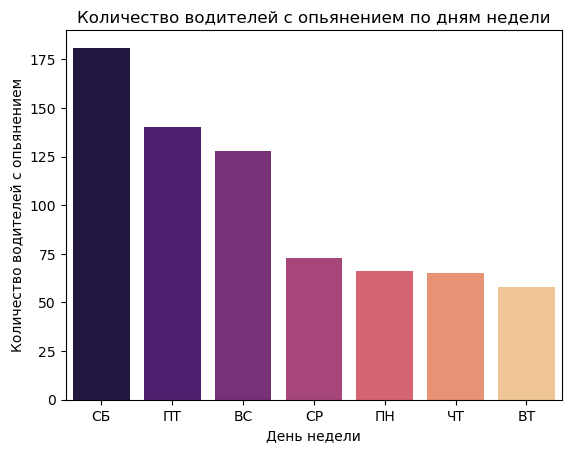

In [6]:
df_dui = df[df['violation'] == 'DUI']
week_dict = {
    'Monday': 'ПН',
    'Tuesday': 'ВТ',
    'Wednesday': 'СР',
    'Thursday':'ЧТ',
    'Friday':'ПТ',
    'Saturday':'СБ',
    'Sunday':'ВС'
}
dui_per_day = df_dui.index.day_name()
dui_count = dui_per_day.value_counts()
dui_count.rename(index=week_dict, inplace=True)
sns.barplot(x=dui_count.index, y=dui_count.values, palette='magma')
plt.xlabel('День недели')
plt.ylabel('Количество водителей с опьянением')
plt.title('Количество водителей с опьянением по дням недели')
plt.xticks(rotation=0)
plt.show()

C:\Users\Arseny\AppData\Local\Temp\ipykernel_8504\622904485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=equipment_count.index, y=equipment_count.values, palette='magma')


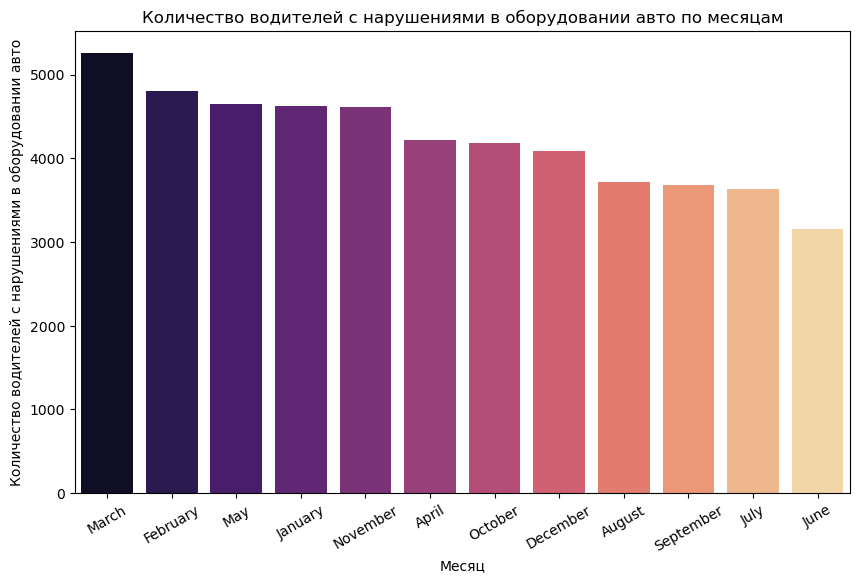

In [7]:
df_equipment = df[df['violation'] == 'Equipment']
equipment_per_month = df_equipment.index.month_name()
equipment_count = equipment_per_month.value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=equipment_count.index, y=equipment_count.values, palette='magma')
plt.xlabel('Месяц')
plt.ylabel('Количество водителей с нарушениями в оборудовании авто')
plt.title('Количество водителей с нарушениями в оборудовании авто по месяцам')
plt.xticks(rotation=30)
plt.show()
#цикличность присутствует, по графику видно, что больше нарушений происходит в период с конца осени по весну

C:\Users\Arseny\AppData\Local\Temp\ipykernel_8504\4135116203.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='magma')


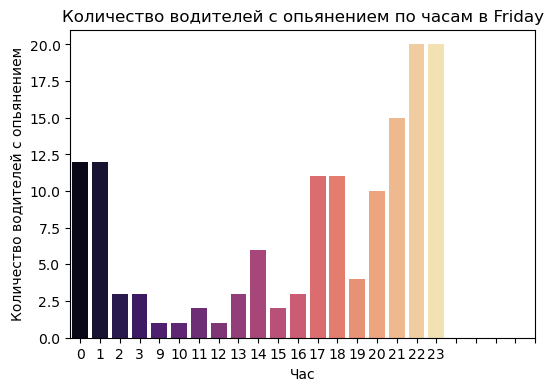

C:\Users\Arseny\AppData\Local\Temp\ipykernel_8504\4135116203.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='magma')


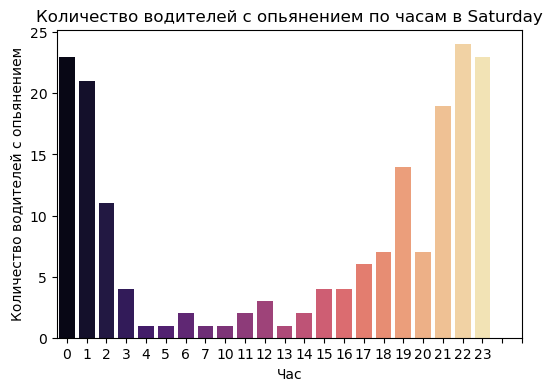

C:\Users\Arseny\AppData\Local\Temp\ipykernel_8504\4135116203.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='magma')


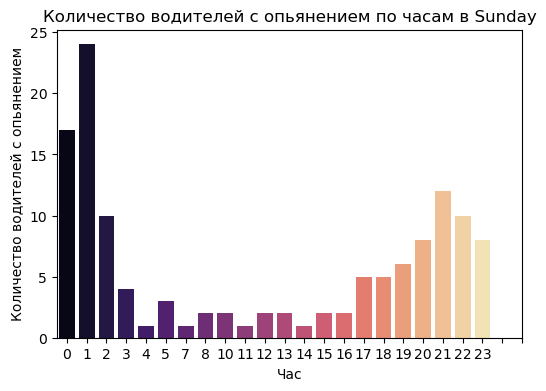

Самый пьяный час: 1 с 24 задержанными


In [8]:
need_days = ['Friday', 'Saturday', 'Sunday']
df_happy_time = df_dui[df_dui.index.day_name().isin(need_days)]

for day in need_days:
    df_happy_time = df_dui[df_dui.index.day_name() == day]
    hourly_counts = df_happy_time.index.hour.value_counts().sort_index()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='magma')
    plt.xlabel('Час')
    plt.ylabel('Количество водителей с опьянением')
    plt.title(f'Количество водителей с опьянением по часам в {day}')
    plt.xticks(range(0, 24))
    plt.show()

drunk_hour = hourly_counts.idxmax()
drunk_hour_count = hourly_counts.max()
print(f"Самый пьяный час: {drunk_hour} с {drunk_hour_count} задержанными")